# GLOBAL TERRORISM - EDA

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')
# Loading the dataset 
df = pd.read_csv('global_terrorism.csv', encoding='ISO-8859-1')
df.head()
# https://www.kaggle.com/datasets/deepaksakthivk/global-terrorism-data 
#download the dataset from the above link!!

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [2]:
d=df.isnull().sum().to_dict()
d

{'eventid': 0,
 'iyear': 0,
 'imonth': 0,
 'iday': 0,
 'approxdate': 172452,
 'extended': 0,
 'resolution': 179471,
 'country': 0,
 'country_txt': 0,
 'region': 0,
 'region_txt': 0,
 'provstate': 421,
 'city': 434,
 'latitude': 4556,
 'longitude': 4557,
 'specificity': 6,
 'vicinity': 0,
 'location': 126196,
 'summary': 66129,
 'crit1': 0,
 'crit2': 0,
 'crit3': 0,
 'doubtterr': 1,
 'alternative': 152680,
 'alternative_txt': 152680,
 'multiple': 1,
 'success': 0,
 'suicide': 0,
 'attacktype1': 0,
 'attacktype1_txt': 0,
 'attacktype2': 175377,
 'attacktype2_txt': 175377,
 'attacktype3': 181263,
 'attacktype3_txt': 181263,
 'targtype1': 0,
 'targtype1_txt': 0,
 'targsubtype1': 10373,
 'targsubtype1_txt': 10373,
 'corp1': 42550,
 'target1': 636,
 'natlty1': 1559,
 'natlty1_txt': 1559,
 'targtype2': 170547,
 'targtype2_txt': 170547,
 'targsubtype2': 171006,
 'targsubtype2_txt': 171006,
 'corp2': 171574,
 'target2': 170671,
 'natlty2': 170863,
 'natlty2_txt': 170863,
 'targtype3': 180515,
 

## FEATURE ENGINEERING ON THE DATA

In [3]:
# Removing columns that are not useful for our analysis
df1 = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound']]

# Check for missing values
print(df1.isnull().sum())

# Filling the missing values with 0
df1.fillna(0)

# Renaming the columns 
df1.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'city':'City', 'latitude':'Latitude', 'longitude':'Longitude', 'attacktype1_txt':'AttackType', 'targtype1_txt':'TargetType', 'weaptype1_txt':'WeaponType', 'nkill':'Fatalities', 'nwound':'Injuries'}, inplace=True)


iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
city                 434
latitude            4556
longitude           4557
attacktype1_txt        0
targtype1_txt          0
weaptype1_txt          0
nkill              10313
nwound             16311
dtype: int64


In [4]:
# Convert string dates to DateTime format
df1['Date'] = pd.to_datetime(df1['Year'].astype(str) + '-' +
                             df1['Month'].astype(str) + '-' + 
                             df1['Day'].astype(str), errors='coerce')

df1.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)


In [5]:
print(df1.info())
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Country     181691 non-null  object        
 1   Region      181691 non-null  object        
 2   City        181257 non-null  object        
 3   Latitude    177135 non-null  float64       
 4   Longitude   177134 non-null  float64       
 5   AttackType  181691 non-null  object        
 6   TargetType  181691 non-null  object        
 7   WeaponType  181691 non-null  object        
 8   Fatalities  171378 non-null  float64       
 9   Injuries    165380 non-null  float64       
 10  Date        180800 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 15.2+ MB
None


Country           0
Region            0
City            434
Latitude       4556
Longitude      4557
AttackType        0
TargetType        0
WeaponType        0
Fatalities    10313
Injuries      16311
Date            891
dtype: int64

In [6]:
city=df1['City'].value_counts().to_dict()
city


{'Unknown': 9775,
 'Baghdad': 7589,
 'Karachi': 2652,
 'Lima': 2359,
 'Mosul': 2265,
 'Belfast': 2171,
 'Santiago': 1621,
 'Mogadishu': 1581,
 'San Salvador': 1558,
 'Istanbul': 1048,
 'Athens': 1019,
 'Bogota': 984,
 'Kirkuk': 925,
 'Beirut': 918,
 'Medellin': 848,
 'Benghazi': 840,
 'Peshawar': 819,
 'Quetta': 803,
 'Guatemala City': 755,
 'Baqubah': 745,
 'Kabul': 738,
 'Srinagar': 658,
 'Jerusalem': 636,
 'Paris': 612,
 'Fallujah': 582,
 'Tripoli': 565,
 'Dhaka': 557,
 'Rome': 551,
 'Arish': 521,
 'Ramadi': 509,
 'Manila': 488,
 'Aleppo': 486,
 'Sanaa': 472,
 'Buenos Aires': 465,
 'New York City': 460,
 'Ayacucho': 459,
 'Maiduguri': 442,
 'Imphal': 426,
 'Tikrit': 418,
 'Madrid': 414,
 'Algiers': 407,
 'London': 399,
 'Damascus': 371,
 'Londonderry': 366,
 'Kandahar': 363,
 'Gaza': 337,
 'Bilbao': 335,
 'Abu Ghraib': 324,
 'Colombo': 323,
 'Cali': 311,
 'Ajaccio': 305,
 'Ankara': 289,
 'Aden': 285,
 'Tehran': 277,
 'Tuz Khormato': 277,
 'Rafah': 274,
 'Donostia-San Sebastian': 272

In [7]:
df1['City'] = df1['City'].fillna('Unknown')

In [8]:
lat=df1['Latitude'].value_counts().to_dict()
lat

{33.303566: 7521,
 24.891115: 2686,
 -11.967368: 2401,
 36.354145: 2247,
 54.607712: 2189,
 -33.366238: 1562,
 13.69288: 1559,
 2.059819: 1536,
 41.106178: 1052,
 37.99749: 1017,
 4.667128: 990,
 33.888523: 914,
 35.45211: 907,
 6.242026: 857,
 14.622869: 849,
 32.069286: 831,
 30.200819: 793,
 34.006004: 787,
 34.516895: 735,
 33.74324: 719,
 34.08374: 646,
 48.856644: 607,
 33.349159: 562,
 23.791275: 560,
 41.890961: 553,
 31.126646: 513,
 33.420948: 491,
 31.771599: 484,
 36.201721: 475,
 15.325443: 466,
 40.697132: 460,
 -34.61768: 458,
 14.596051: 454,
 24.798346: 440,
 11.840929: 438,
 -13.152712: 419,
 40.465595: 419,
 51.504387: 413,
 55.011562: 394,
 34.621521: 393,
 36.763763: 387,
 31.502407: 378,
 33.515244: 352,
 43.258434: 332,
 33.31065: 319,
 41.918891: 318,
 31.631083: 317,
 3.429344: 313,
 43.291618: 313,
 41.930607: 307,
 39.930771: 292,
 6.941837: 287,
 35.724533: 281,
 12.825647: 281,
 -26.184113: 274,
 32.867867: 271,
 34.881348: 264,
 34.417122: 264,
 33.100529:

In [9]:
# creating a dictionary from city and latitude columns
city_lat = dict(zip(df1['City'], df1['Latitude']))

#print('The dictionary city_lat is:',city_lat)

# filling the  missing latitude values with corresponding city's latitude
df1['Latitude'] = df1['Latitude'].fillna(df1['City'].map(city_lat))
df1['Latitude'].isnull().sum()

1947

In [10]:
# filling the other latitudes with 0
df1['Latitude'] = df1['Latitude'].fillna(0)

In [11]:
#same for longitudes!
# creating a dictionary from city and Logitude columns
city_lon = dict(zip(df1['City'], df1['Longitude']))

#print('The dictionary city_lat is:',city_lat)

# filling the  missing latitude values with corresponding city's latitude
df1['Longitude'] = df1['Longitude'].fillna(df1['City'].map(city_lon))
df1['Longitude'].isnull().sum()

1948

In [12]:
# filling the other Longitude with 0
df1['Longitude'] = df1['Longitude'].fillna(0)

In [13]:
# fill the number of kills and wounds based on the weapon used by the terrorist!!

# creating a dictionary from Fatalities and Weapon_type columns
weap_fatal = dict(zip(df1['WeaponType'], df1['Fatalities']))

df1['Fatalities'] = df1['Fatalities'].fillna(df1['WeaponType'].map(weap_fatal))
df1['Fatalities'].isnull().sum()

0

In [14]:
# creating a dictionary from Injured and Weapon_type  columns

weap_inj = dict(zip(df1['WeaponType'], df1['Injuries']))

df1['Injuries'] = df1['Injuries'].fillna(df1['WeaponType'].map(weap_inj))
df1['Injuries'].isnull().sum()

0

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Country     181691 non-null  object        
 1   Region      181691 non-null  object        
 2   City        181691 non-null  object        
 3   Latitude    181691 non-null  float64       
 4   Longitude   181691 non-null  float64       
 5   AttackType  181691 non-null  object        
 6   TargetType  181691 non-null  object        
 7   WeaponType  181691 non-null  object        
 8   Fatalities  181691 non-null  float64       
 9   Injuries    181691 non-null  float64       
 10  Date        180800 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 15.2+ MB


# EDA!!

<Axes: >

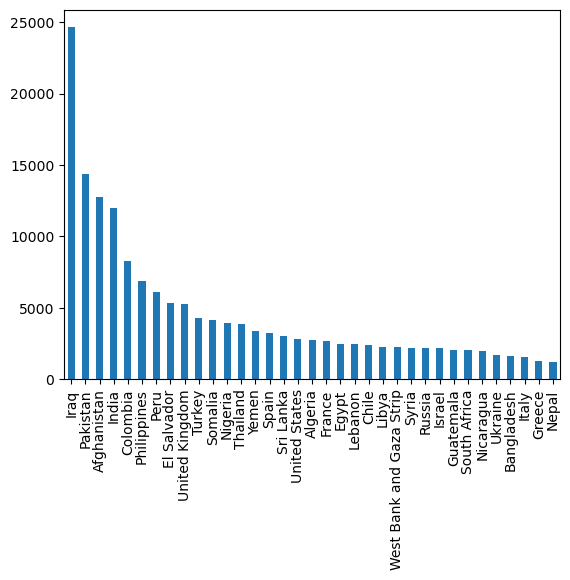

In [16]:
# Bar chart of terrorist attacks by country


# country counts and filter by count > 1000
'''country = df1['Country'].value_counts()
country_top = country[country > 1000]

country_top.plot(kind='bar')
'''
# top 35 countries in terrorist activities
df1['Country'].value_counts()[:35].plot(kind='bar')

<Axes: >

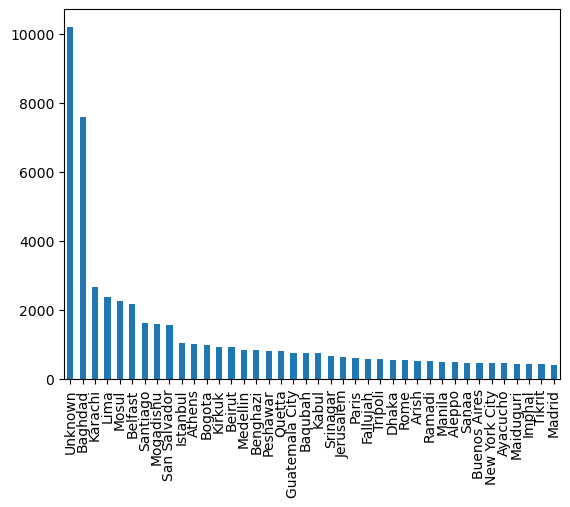

In [17]:
# Bar chart of terrorist attacks by city

df1['City'].value_counts()[:40].plot(kind='bar')

<Axes: >

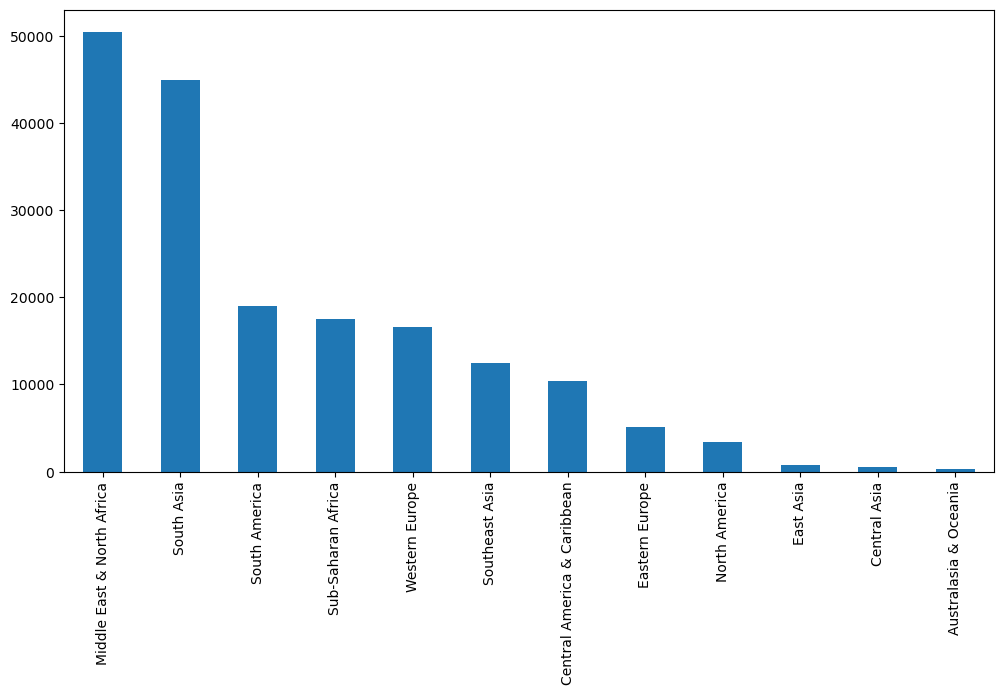

In [18]:
# Bar chart of terrorist attacks by region

df1['Region'].value_counts().plot(kind='bar',figsize=(12,6))

<Axes: >

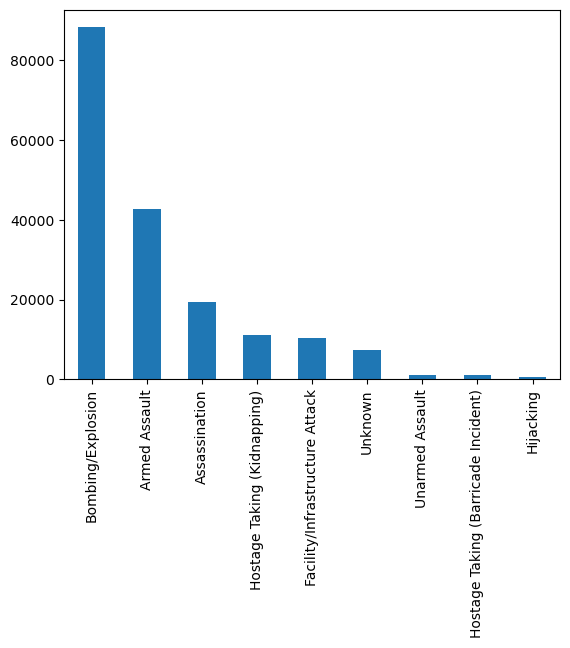

In [19]:
# Bar chart of terrorist attacks by attack type

df1['AttackType'].value_counts().plot(kind='bar')

<Axes: >

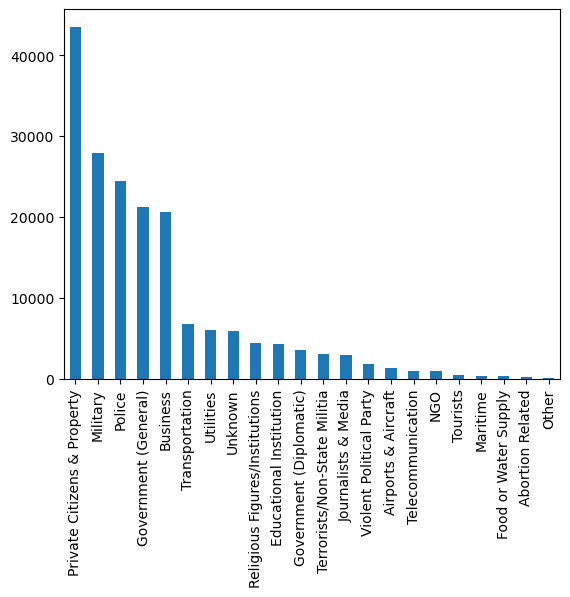

In [20]:
# Bar chart of terrorist targets by Target Type  

df1['TargetType'].value_counts().plot(kind='bar')

<Axes: >

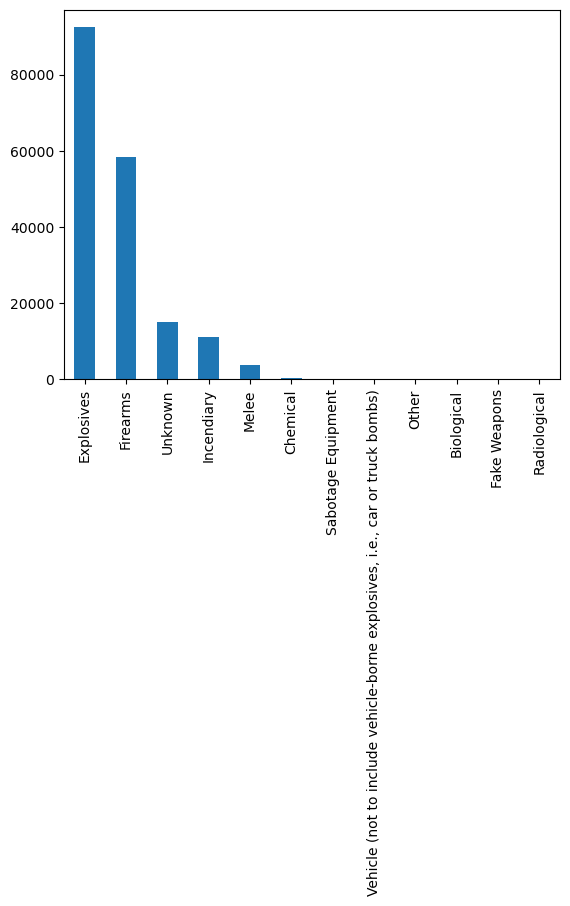

In [21]:
# Bar chart of terrorist weapons by Weapon Type  

df1['WeaponType'].value_counts().plot(kind='bar')

the most death rate: 1570.0
the least death rate: 0.0
the death rate on average 2


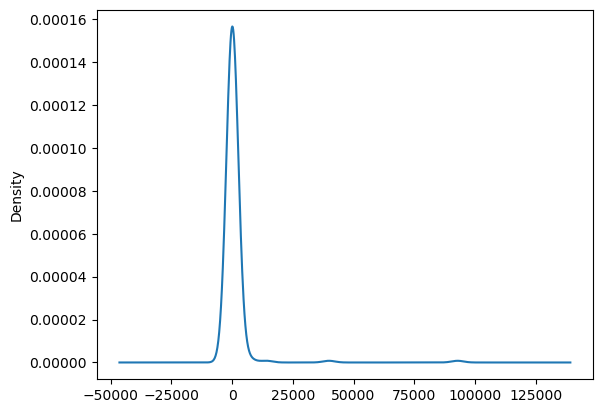

In [22]:
#Fatalities  
# Bar chart of terrorist weapons by Weapon Type  

df1['Fatalities'].value_counts().plot(kind='kde')
print('the most death rate:',df1['Fatalities'].max())
print('the least death rate:',df1['Fatalities'].min())
print('the death rate on average',int(df1['Fatalities'].mean()))


<Axes: >

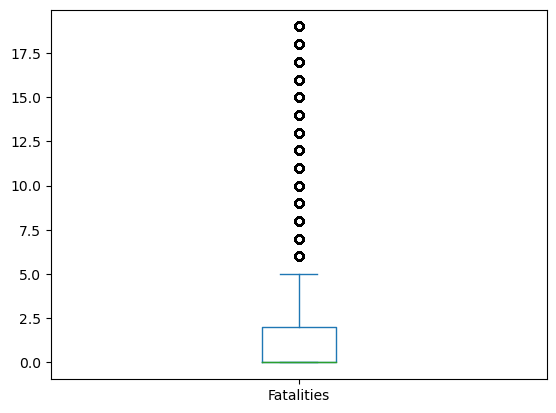

In [23]:
#df1['Fatalities'].std()
# the average dead rate is 2, but usually the dead rates vary, they dont follow a fashion
dead=df1[df1['Fatalities']<20]
dead['Fatalities'].plot(kind='box')

In [24]:
# log transformation on Fatalities
df1['Fatalities']=df1['Fatalities'].apply(lambda x:np.log(x+1))


<Axes: ylabel='Density'>

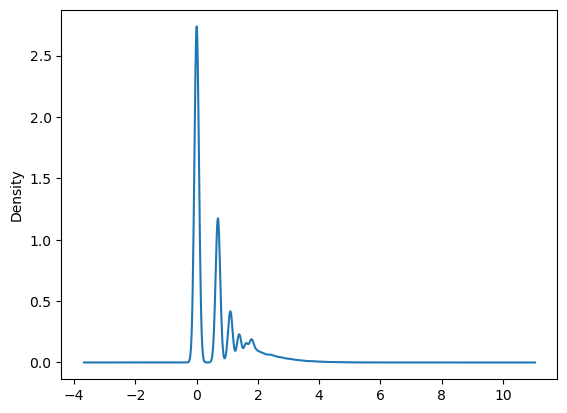

In [25]:
df1['Fatalities'].plot(kind='kde')

BIVARIATE ANALYSIS

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Country     181691 non-null  object        
 1   Region      181691 non-null  object        
 2   City        181691 non-null  object        
 3   Latitude    181691 non-null  float64       
 4   Longitude   181691 non-null  float64       
 5   AttackType  181691 non-null  object        
 6   TargetType  181691 non-null  object        
 7   WeaponType  181691 non-null  object        
 8   Fatalities  181691 non-null  float64       
 9   Injuries    181691 non-null  float64       
 10  Date        180800 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 15.2+ MB


<Axes: xlabel='Fatalities', ylabel='WeaponType'>

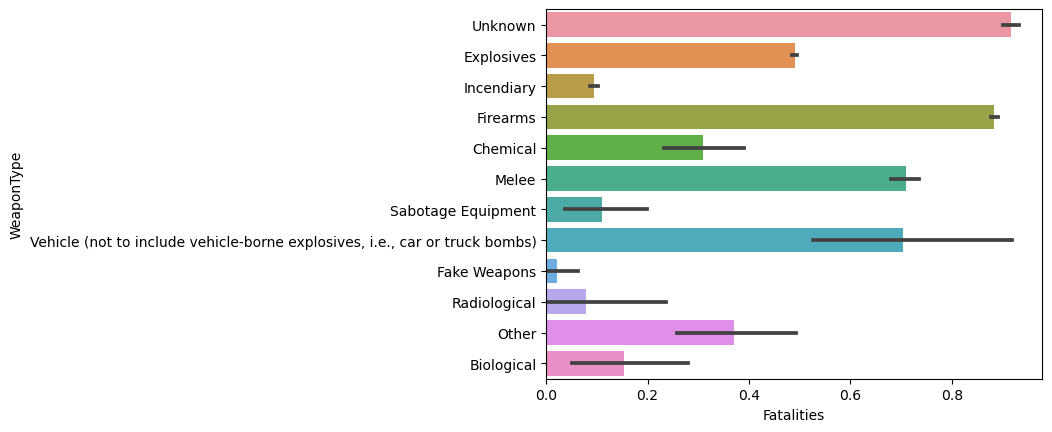

In [27]:
import seaborn as sns
 
sns.barplot(y='WeaponType',x='Fatalities',data=df1)

<Axes: xlabel='Injuries', ylabel='WeaponType'>

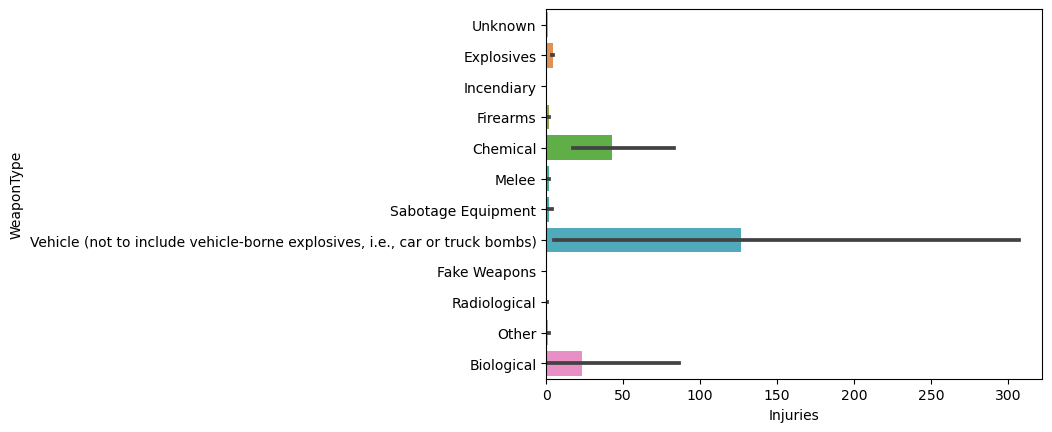

In [28]:
sns.barplot(y='WeaponType',x='Injuries',data=df1)